<a href="https://colab.research.google.com/github/A-Roopa/Bharath-Intern-Task-2/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

**`Load Data`**

In [58]:
# Load the data
data = pd.read_csv('/content/titanic.csv')

**Preprocessing and Data Preparation**




In [66]:

# Define columns to be used
drop_columns = ['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']
drop_columns

['Passengerid',
 'zero',
 'zero.1',
 'zero.2',
 'zero.3',
 'zero.4',
 'zero.5',
 'zero.6',
 'zero.7',
 'zero.8',
 'zero.9',
 'zero.10',
 'zero.11',
 'zero.12',
 'zero.13',
 'zero.14',
 'zero.15',
 'zero.16',
 'zero.17',
 'zero.18']

In [67]:
# Drop unnecessary columns
X = data.drop(drop_columns, axis=1)
X

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [68]:

# Separate the target variable and rename it to 'Survived'
y = data['2urvived']
y.name = 'Survived'

In [69]:
# Rename columns to match the standard names
X.rename(columns={'sibsp': 'SibSp'}, inplace=True)
X.rename

<bound method DataFrame.rename of        Age      Fare  Sex  SibSp  Parch  Pclass  Embarked  2urvived
0     22.0    7.2500    0      1      0       3       2.0         0
1     38.0   71.2833    1      1      0       1       0.0         1
2     26.0    7.9250    1      0      0       3       2.0         1
3     35.0   53.1000    1      1      0       1       2.0         1
4     35.0    8.0500    0      0      0       3       2.0         0
...    ...       ...  ...    ...    ...     ...       ...       ...
1304  28.0    8.0500    0      0      0       3       2.0         0
1305  39.0  108.9000    1      0      0       1       0.0         0
1306  38.5    7.2500    0      0      0       3       2.0         0
1307  28.0    8.0500    0      0      0       3       2.0         0
1308  28.0   22.3583    0      1      1       3       0.0         0

[1309 rows x 8 columns]>

In [70]:
# Create dummy variables for categorical features
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
X

,Age,Fare,SibSp,Parch,Pclass,2urvived,Sex_1,Embarked_1.0,Embarked_2.0
0,22.0,7.2500,1,0,3,0,False,False,True
1,38.0,71.2833,1,0,1,1,True,False,False
2,26.0,7.9250,0,0,3,1,True,False,True
3,35.0,53.1000,1,0,1,1,True,False,True
4,35.0,8.0500,0,0,3,0,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,3,0,False,False,True
1305,39.0,108.9000,0,0,1,0,True,False,False
1306,38.5,7.2500,0,0,3,0,False,False,True
1307,28.0,8.0500,0,0,3,0,False,False,True


In [71]:
# Define numeric and categorical columns
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = [col for col in X.columns if col not in numeric_features]


In [72]:
# Debug: Print columns
print("Numeric Features: ", numeric_features)
print("Categorical Features: ", categorical_features)

Numeric Features:  ['Age', 'Fare', 'SibSp', 'Parch']
Categorical Features:  ['Pclass', '2urvived', 'Sex_1', 'Embarked_1.0', 'Embarked_2.0']


In [73]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


In [74]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [75]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Debug: Print the preprocessed training data columns
X_train_transformed = preprocessor.fit_transform(X_train)
print("Transformed Training Data Shape: ", X_train_transformed.shape)


Transformed Training Data Shape:  (1047, 9)


**Model Evaluation Function**



In [44]:
# Function to create and evaluate a model
def evaluate_model(model, name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} Score: {score}")

    # Plot confusion matrix
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot ROC curve
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return pipeline


Random Forest Score: 1.0


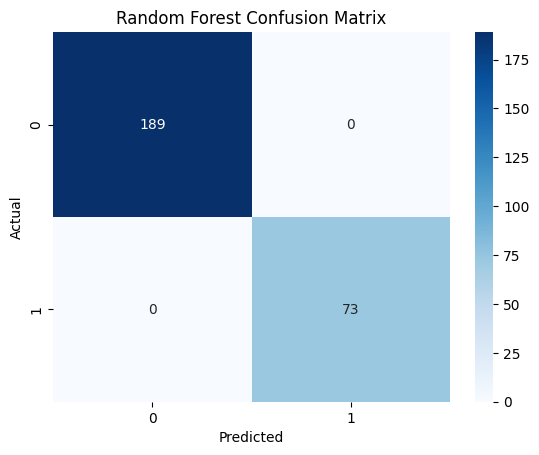

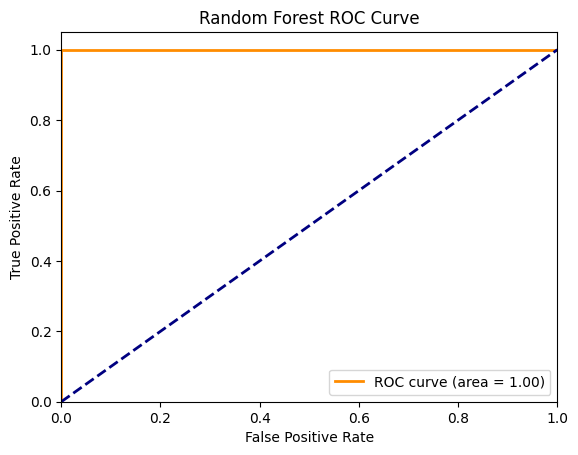

In [46]:
# Random Forest
rf_pipeline = evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")


Gradient Boosting Score: 1.0


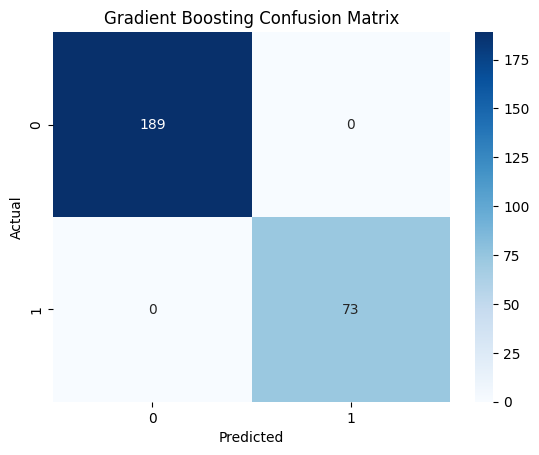

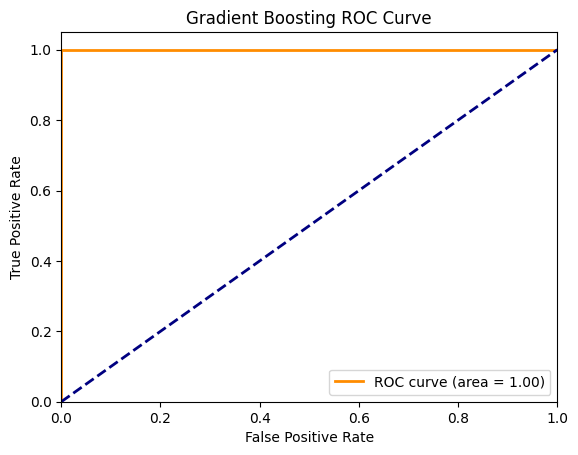

In [47]:
# Gradient Boosting
gb_pipeline = evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting")

XGBoost Score: 1.0


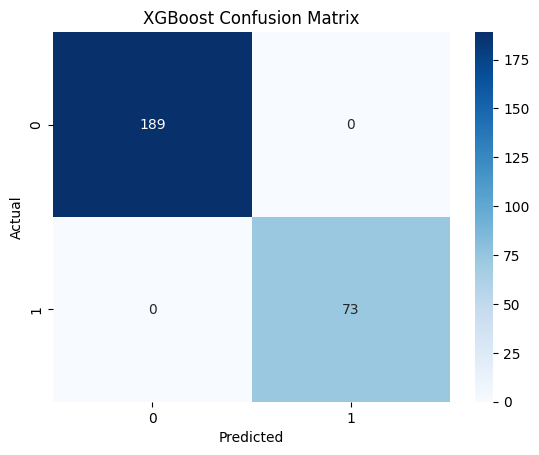

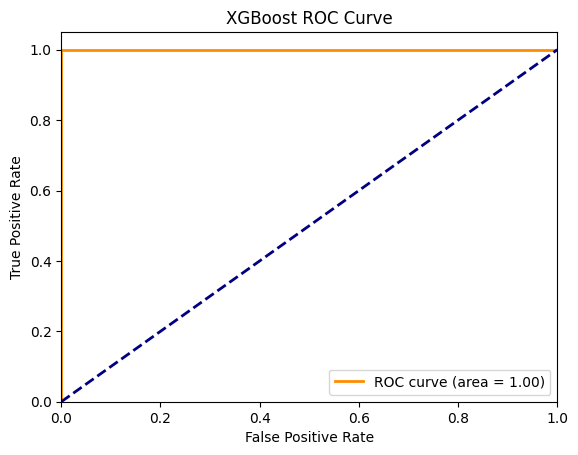

In [48]:
# XGBoost
xgb_pipeline = evaluate_model(XGBClassifier(random_state=42), "XGBoost")


** Feature Engineering**

In [77]:
# 2. More feature engineering
print("\n2. Feature engineering:")

# Create interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(preprocessor.fit_transform(X))


2. Feature engineering:


In [50]:
# Split the new feature set
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [51]:
# Train a model with the new features
rf_clf_poly = RandomForestClassifier(random_state=42)
rf_clf_poly.fit(X_train_poly, y_train_poly)
rf_poly_score = rf_clf_poly.score(X_test_poly, y_test_poly)
print(f"Random Forest with Interaction Features Score: {rf_poly_score}")


Random Forest with Interaction Features Score: 1.0


**Hyperparameter Tuning**


In [52]:
# 3. Hyperparameter tuning
print("\n3. Hyperparameter tuning:")

# Define the parameter space
param_dist = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': randint(5, 20),
    'model__min_samples_split': randint(2, 11),
    'model__min_samples_leaf': randint(1, 11)
}


3. Hyperparameter tuning:


In [53]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

In [54]:
# Create a pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_clf)])

In [55]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)


In [56]:
# Fit the random search object
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'SibSp',
                                                                                'Parch']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent'))]),
                                                                               ['Pclass',
                                                                                '2urvived',
                                                                                'Sex_1',
                                                                                'Embarked_1.0',
                                                                                '...
                   param_distributions={'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x787aa8a20f70>,
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x787aa8a21fc0>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x787aa8a21cf0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x787aab8ba320>},
                   random_state=42)

In [78]:
# Print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


Best parameters:  {'model__max_depth': 11, 'model__min_samples_leaf': 4, 'model__min_samples_split': 9, 'model__n_estimators': 288}
Best cross-validation score:  1.0


In [79]:
# Evaluate on test set
best_rf_score = random_search.score(X_test, y_test)
print(f"Best Random Forest Test Score: {best_rf_score}")


Best Random Forest Test Score: 1.0


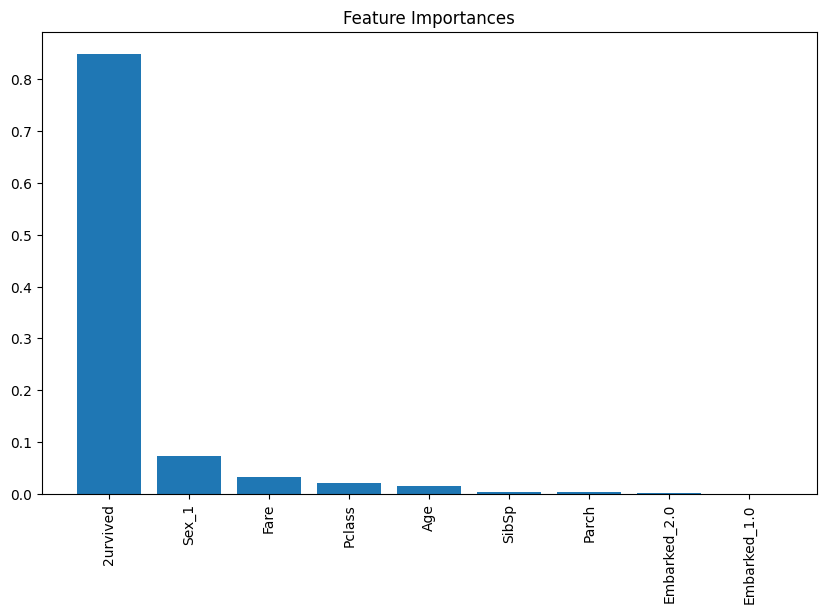

In [80]:
# Plot feature importances
best_rf_model = random_search.best_estimator_.named_steps['model']
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = numeric_features + categorical_features
sorted_features = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.show()

**Ensemble Modeling**

In [81]:
# 4. Ensemble multiple models
print("\n4. Ensemble modeling:")

# Create base models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Create the ensemble model
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    voting='soft'
)


4. Ensemble modeling:


In [82]:
# Create a pipeline with the ensemble
ensemble_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('ensemble', ensemble)])


In [83]:
# Fit the ensemble
ensemble_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Pclass', '2urvived',
                                                   'Sex_1', 'Embarked_1.0',
                                                   'Embarked_2.0'])])),
                ('ensemble',
                 Vot...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                  voting='soft'))])

Ensemble Model Score: 1.0


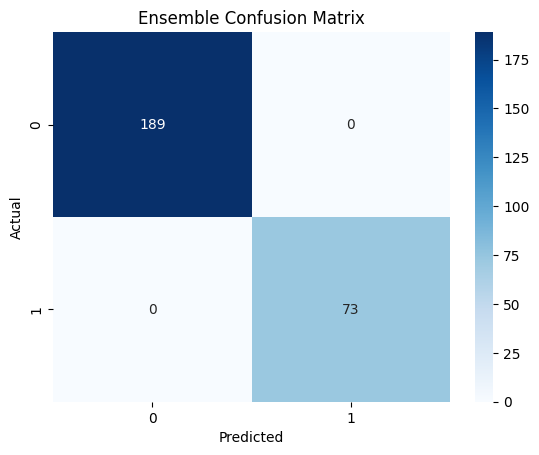

In [84]:
# Evaluate the ensemble
ensemble_score = ensemble_pipeline.score(X_test, y_test)
print(f"Ensemble Model Score: {ensemble_score}")

# Plot ensemble confusion matrix
y_pred_ensemble = ensemble_pipeline.predict(X_test)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

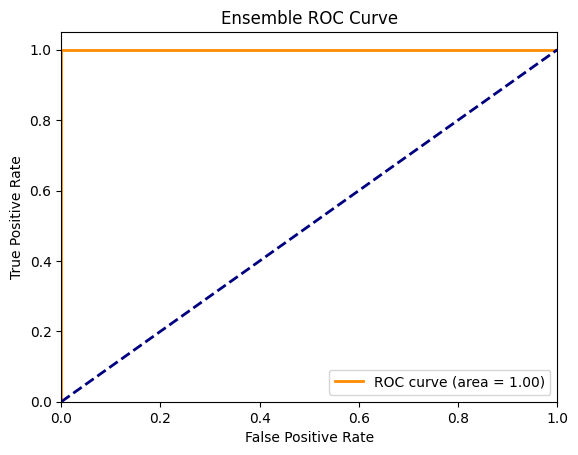

In [85]:
# Plot ensemble ROC curve
y_prob_ensemble = ensemble_pipeline.predict_proba(X_test)[:, 1]
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.legend(loc="lower right")
plt.show()
